In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Reto 1 

Utiliza este dataset: https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption


Transforma ese dataset con las tecnicas vistas en clase en un dataframe que sea apto para un modelo de Machine Learning. Parametriza las variables `WINDOW` (que sera el numero de features) y `lookahead=1`


In [2]:
#Abrimos dataset: hourly power consumption
pch = pd.read_csv("consumo\PJME_hourly.csv")

#plt.plot(pch['PJME_MW'])

In [3]:
pch['T'] = [ elem[:-10] for elem in pch['Datetime'] ]
del(pch['Datetime'])
pch.set_index('T', inplace= True)
pch.columns = ['MW']


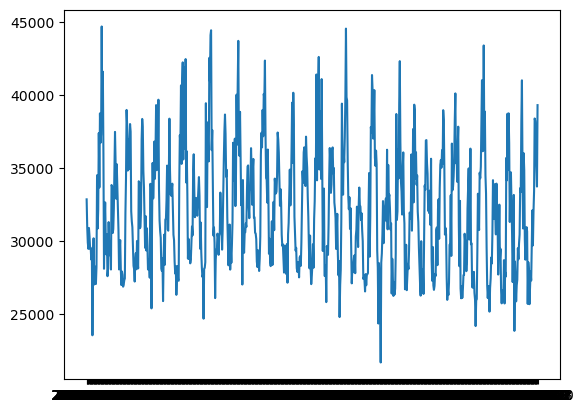

In [4]:
pch_dias = pch.groupby('T')['MW'].mean()
plt.plot(pch_dias)

In [5]:

#pch_dias['Dia'] = np.arange(0, len(pch_dias['MW']), step=1)

window = 50
lookahead = 1

x = []
y = []

for i in range(len(pch_dias) - window - lookahead +1):
    x.append(pch_dias[i:i+window])
    y.append(pch_dias[i+window+lookahead-1])
    
x = np.array(x)
y = np.array(y)

In [6]:
y.shape

(730,)

In [7]:
x.shape

(730, 50)

Entrena un modelo para este dataset, dividiendo correctamente entre train y test.

**Extra**: Utiliza LightGBM o XGBoost (tendras que ver como instalarlo correctamente y leer su documentacion)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

In [9]:
from xgboost import XGBRegressor

In [10]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [11]:
model.score(x_test, y_test)

0.5660840336111296

In [12]:
x_train.shape

(584, 50)

In [13]:
y_train.shape

(584,)



**Extra**: Haz predicciones recurrentes igual al numero de valores en el test set. Esto es, cuando realices la primera prediccion (t+1) tendras un nuevo punto en tu dataset. Utilizalo para construir los datos necesarios para poder predecir t+2, no utlices los datos originales.
Repite este proceso hasta predecir todo el test set.
Haz un plot en el que se muestren los datos originales y los datos predecidos.


In [14]:
x_train.shape

(584, 50)

In [15]:
X_NEXT = x_train[-1] ## valores para utilizar en la primera prediccion
serie_predecida = []

for i in range(len(x_test)):
    y_next = model.predict([X_NEXT]) ## resultado de la primera prediccion
    serie_predecida.append(float(y_next))    
    ## quitamos el primer valor de X(el dato mas antiguo)
    ## y ponemos al final de la lista el valor predecido
    X_NEXT = list(X_NEXT)[1:] + [float(y_next)] 

In [16]:
y_pred = model.predict(x_test)

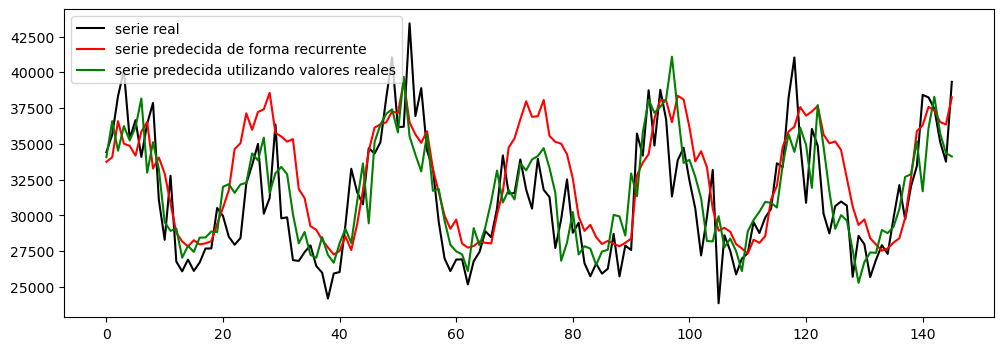

In [17]:
plt.figure(figsize=(12, 4))

plt.plot(y_test, label='serie real', color='black')
plt.plot(serie_predecida, label='serie predecida de forma recurrente', color='r')
plt.plot(y_pred, label='serie predecida utilizando valores reales', color='g')

plt.legend()

### Reto 2

Repite el ejercicio de prediccion de precios de las casas.



In [18]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

A la hora de entrenar el modelo utiliza el metodo `GridSearchCV` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) siguiendo la documentacion.



In [19]:
from sklearn.model_selection import GridSearchCV

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
parametr = { 'fit_intercept': [True,False],
             'n_jobs': [-2,-1,1]}
clf = GridSearchCV(reg, parametr)
clf.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1]})



Cuando termines haz un `print(model.cv_results_)`, siendo la variable `model` el objeto de `GridSearchCV`. ¿Que hay ahi? Analiza las distintas partes del resultado.


In [25]:
print(clf.cv_results_)

{'mean_fit_time': array([0.02126245, 0.00199466, 0.00179529, 0.0009973 , 0.00139642,
       0.00139618]), 'std_fit_time': array([3.90367318e-02, 1.78416128e-07, 3.98993560e-04, 0.00000000e+00,
       4.88519494e-04, 4.88713960e-04]), 'mean_score_time': array([0.0009975 , 0.00019937, 0.00059834, 0.0009974 , 0.00059848,
       0.00059843]), 'std_score_time': array([1.09257989e-03, 3.98731232e-04, 4.88538753e-04, 1.16800773e-07,
       4.88655647e-04, 4.88616574e-04]), 'param_fit_intercept': masked_array(data=[True, True, True, False, False, False],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_jobs': masked_array(data=[-2, -1, 1, -2, -1, 1],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'fit_intercept': True, 'n_jobs': -2}, {'fit_intercept': True, 'n_jobs': -1}, {'fit_intercept': True, 'n_jobs': 1}, {'fit_intercept': False, 'n_jobs': -2}



¿Cuantos valores hay en las listas que aparecen?
¿Cuantos modelos se han entrenado en total?
¿Cual es el mejor modelo?
¿Que ocurre cuando hacemos una inferencia?

mean_test_score: valoracion promedio para todas las posibilidades. Es una medida general del rendimiento del modelo con esa configuración de hiperparámetros.

std_test_score: desviación estandar de los puntajes de prueba para todas las particiones.

rank_test_score: Indica el ranking de las diferentes combinaciones de hiperparámetros según su rendimiento en función del 

6 modelos entrenados (2x3 hiperparametros)

Mejor modelo: menor rank test score

Inferencia = se realiza con los hiperparametros optimos que tengan el menor rank